# Rppg 신호측정

In [1]:
import cv2

from scipy import signal
import numpy as np
import os
import matplotlib.pyplot as plt
import time
import glob
import natsort
import csv

In [2]:
def create_skin_mask(img):
    mask = None
    # 얼굴영역 검출 (피부픽셀 검출)
    try:
        low = np.array([0, 133, 77], np.uint8)
        high = np.array([235, 173, 127], np.uint8)
        
        # 얼굴 box를 찾은 후에 피부픽셀만 분리하는 함수 (실시간성을 고려하지 않으면 다른 모델로 대체 가능)
        ycrcb = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
        mask = cv2.inRange(ycrcb, low, high)
        mask[mask == 255] = 1
    except Exception:
        pass

    return mask

def detrend_signal(arr, win_size):
    # 신호 후처리 함수 (detrend = 추세 를 없앤다.)
    #심박과 관련없는 저주파 와 같은 추세를 없애는 것
    try:
        if arr.ndim == 1:
            arr = np.expand_dims(arr, axis=0)
        n_channel = arr.shape[0]
        norm = signal.convolve2d(np.ones_like(arr), np.ones((n_channel, win_size)), mode='same')
        mean = signal.convolve2d(arr, np.ones((n_channel, win_size)), mode='same') / norm
        return (arr - mean) / (mean + 1e-15)
    except ValueError:
        return arr

def filter_bandpass(arr, srate, band):
    #대역통과필터
    try:
        # 심박수(bpm)의 주파수 도메인은 HZ , 따라서 60을 곱해야 초당이 아닌 분당으로 계산
        nyq = 60 * srate / 2
        coef_vector = signal.butter(5, [band[0] / nyq, band[1] / nyq], 'bandpass')
        return signal.filtfilt(*coef_vector, arr)
    except ValueError:
        return arr
    
def estimate_average_pulserate(arr, srate):
    # 후처리가 완료된 데이터로ㅓ 맥박수 측정
    f, pxx = signal.periodogram(arr, fs=srate, window='hann')
    # 가장 쎈 대역? 주파수 를 찾는다. >> 분당으로 환산한것이 pulserate
    max_peak_idx = np.argmax(pxx)
    pulserate = int(f[max_peak_idx] * 60)
    return min(max(pulserate, band[0]), band[1])

img path:  D:\prlab\ysg\rppg\new\images\5\group_0_1_0.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_0_2_33.333300000056624.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_0_3_66.66669999994338.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_0_4_100.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_0_5_133.33330000005662.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_0_6_166.66669999994338.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_0_7_200.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_0_8_233.33330000005662.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_0_9_266.6666999999434.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_0_10_300.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_0_11_333.3333000000566.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_0_12_366.6666999999434.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_0_13_400.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_0_14_433.3333000000566.png
img path:  D:\prl

img path:  D:\prlab\ysg\rppg\new\images\5\group_3_118_3900.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_3_119_3933.3333000000566.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_3_120_3966.6666999999434.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_4_121_4000.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_4_122_4033.3333000000566.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_4_123_4066.6666999999434.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_4_124_4100.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_4_125_4133.333300000057.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_4_126_4166.666699999943.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_4_127_4200.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_4_128_4233.333300000057.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_4_129_4266.666699999943.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_4_130_4300.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_4_131_4333.3333

img path:  D:\prlab\ysg\rppg\new\images\5\group_7_232_7700.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_7_233_7733.333300000057.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_7_234_7766.666699999943.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_7_235_7800.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_7_236_7833.333300000057.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_7_237_7866.666699999943.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_7_238_7900.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_7_239_7933.333300000057.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_7_240_7966.666699999943.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_8_241_8000.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_8_242_8033.333300000057.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_8_243_8066.666699999943.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_8_244_8100.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_8_245_8133.33330000

img path:  D:\prlab\ysg\rppg\new\images\5\group_11_348_11566.666699999943.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_11_349_11600.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_11_350_11633.333300000057.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_11_351_11666.666699999943.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_11_352_11700.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_11_353_11733.333300000057.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_11_354_11766.666699999943.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_11_355_11800.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_11_356_11833.333300000057.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_11_357_11866.666699999943.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_11_358_11900.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_11_359_11933.333300000057.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_11_360_11966.666699999943.png
img path:  D:\prlab\ysg\rppg\n

img path:  D:\prlab\ysg\rppg\new\images\5\group_16_461_16633.333300000057.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_16_462_16666.666699999943.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_16_463_16700.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_16_464_16733.333300000057.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_16_465_16766.666699999943.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_16_466_16800.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_16_467_16833.333300000057.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_16_468_16866.666699999943.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_16_469_16900.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_16_470_16933.333300000057.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_16_471_16966.666699999943.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_17_472_17000.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_17_473_17033.333300000057.png
img path:  D:\prlab\ysg\rppg\n

img path:  D:\prlab\ysg\rppg\new\images\5\group_20_573_20366.666699999943.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_20_574_20400.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_20_575_20433.333300000057.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_20_576_20466.666699999943.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_20_577_20500.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_20_578_20533.333300000057.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_20_579_20566.666699999943.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_20_580_20600.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_20_581_20633.333300000057.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_20_582_20666.666699999943.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_20_583_20700.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_20_584_20733.333300000057.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_20_585_20766.666699999943.png
img path:  D:\prlab\ysg\rppg\n

img path:  D:\prlab\ysg\rppg\new\images\5\group_24_687_24166.666699999943.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_24_688_24200.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_24_689_24233.333300000057.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_24_690_24266.666699999943.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_24_691_24300.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_24_692_24333.333300000057.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_24_693_24366.666699999943.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_24_694_24400.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_24_695_24433.333300000057.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_24_696_24466.666699999943.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_24_697_24500.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_24_698_24533.333300000057.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_24_699_24566.666699999943.png
img path:  D:\prlab\ysg\rppg\n

img path:  D:\prlab\ysg\rppg\new\images\5\group_27_798_27866.666699999943.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_27_799_27900.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_27_800_27933.333300000057.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_27_801_27966.666699999943.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_28_802_28000.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_28_803_28033.333300000057.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_28_804_28066.666699999943.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_28_805_28100.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_28_806_28133.333300000057.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_28_807_28166.666699999943.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_28_808_28200.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_28_809_28233.333300000057.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_28_810_28266.666699999943.png
img path:  D:\prlab\ysg\rppg\n

img path:  D:\prlab\ysg\rppg\new\images\5\group_31_911_31633.333300000057.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_31_912_31666.666699999943.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_31_913_31700.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_31_914_31733.333300000057.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_31_915_31766.666699999943.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_31_916_31800.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_31_917_31833.333300000057.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_31_918_31866.666699999943.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_31_919_31900.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_31_920_31933.333300000057.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_31_921_31966.666699999943.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_32_922_32000.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_32_923_32033.333300000057.png
img path:  D:\prlab\ysg\rppg\n

img path:  D:\prlab\ysg\rppg\new\images\5\group_35_1025_35433.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_35_1026_35466.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_35_1027_35500.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_35_1028_35533.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_35_1029_35566.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_35_1030_35600.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_35_1031_35633.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_35_1032_35666.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_35_1033_35700.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_35_1034_35733.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_35_1035_35766.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_35_1036_35800.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_35_1037_35833.33330000006.png
img path:  D:\prlab\ysg\rp

img path:  D:\prlab\ysg\rppg\new\images\5\group_39_1135_39100.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_39_1136_39133.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_39_1137_39166.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_39_1138_39200.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_39_1139_39233.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_39_1140_39266.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_39_1141_39300.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_39_1142_39333.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_39_1143_39366.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_39_1144_39400.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_39_1145_39433.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_39_1146_39466.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_39_1147_39500.0.png
img path:  D:\prlab\ysg\rppg\new\ima

img path:  D:\prlab\ysg\rppg\new\images\5\group_42_1249_42900.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_42_1250_42933.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_42_1251_42966.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_43_1252_43000.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_43_1253_43033.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_43_1254_43066.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_43_1255_43100.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_43_1256_43133.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_43_1257_43166.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_43_1258_43200.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_43_1259_43233.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_43_1260_43266.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_43_1261_43300.0.png
img path:  D:\prlab\ysg\rppg\new\ima

img path:  D:\prlab\ysg\rppg\new\images\5\group_46_1362_46666.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_46_1363_46700.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_46_1364_46733.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_46_1365_46766.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_46_1366_46800.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_46_1367_46833.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_46_1368_46866.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_46_1369_46900.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_46_1370_46933.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_46_1371_46966.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_47_1372_47000.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_47_1373_47033.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_47_1374_47066.66669999994.png
img path:  D:\prlab\ysg\rp

img path:  D:\prlab\ysg\rppg\new\images\5\group_50_1473_50366.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_50_1474_50400.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_50_1475_50433.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_50_1476_50466.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_50_1477_50500.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_50_1478_50533.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_50_1479_50566.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_50_1480_50600.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_50_1481_50633.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_50_1482_50666.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_50_1483_50700.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_50_1484_50733.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_50_1485_50766.66669999994.png
img path:  D:\prlab\ysg\rp

img path:  D:\prlab\ysg\rppg\new\images\5\group_54_1586_54133.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_54_1587_54166.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_54_1588_54200.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_54_1589_54233.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_54_1590_54266.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_54_1591_54300.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_54_1592_54333.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_54_1593_54366.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_54_1594_54400.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_54_1595_54433.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_54_1596_54466.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_54_1597_54500.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_54_1598_54533.33330000006.png
img path:  D:\prlab\ysg\rp

img path:  D:\prlab\ysg\rppg\new\images\5\group_57_1699_57900.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_57_1700_57933.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_57_1701_57966.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_58_1702_58000.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_58_1703_58033.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_58_1704_58066.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_58_1705_58100.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_58_1706_58133.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_58_1707_58166.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_58_1708_58200.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_58_1709_58233.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_58_1710_58266.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_58_1711_58300.0.png
img path:  D:\prlab\ysg\rppg\new\ima

img path:  D:\prlab\ysg\rppg\new\images\5\group_61_1813_61700.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_61_1814_61733.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_61_1815_61766.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_61_1816_61800.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_61_1817_61833.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_61_1818_61866.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_61_1819_61900.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_61_1820_61933.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_61_1821_61966.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_62_1822_62000.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_62_1823_62033.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_62_1824_62066.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_62_1825_62100.0.png
img path:  D:\prlab\ysg\rppg\new\ima

img path:  D:\prlab\ysg\rppg\new\images\5\group_65_1927_65500.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_65_1928_65533.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_65_1929_65566.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_65_1930_65600.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_65_1931_65633.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_65_1932_65666.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_65_1933_65700.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_65_1934_65733.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_65_1935_65766.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_65_1936_65800.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_65_1937_65833.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_65_1938_65866.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_65_1939_65900.0.png
img path:  D:\prlab\ysg\rppg\new\ima

img path:  D:\prlab\ysg\rppg\new\images\5\group_69_2039_69233.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_69_2040_69266.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_69_2041_69300.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_69_2042_69333.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_69_2043_69366.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_69_2044_69400.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_69_2045_69433.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_69_2046_69466.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_69_2047_69500.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_69_2048_69533.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_69_2049_69566.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_69_2050_69600.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_69_2051_69633.33330000006.png
img path:  D:\prlab\ysg\rp

img path:  D:\prlab\ysg\rppg\new\images\5\group_72_2150_72933.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_72_2151_72966.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_73_2152_73000.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_73_2153_73033.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_73_2154_73066.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_73_2155_73100.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_73_2156_73133.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_73_2157_73166.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_73_2158_73200.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_73_2159_73233.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_73_2160_73266.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_73_2161_73300.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_73_2162_73333.33330000006.png
img path:  D:\prlab\ysg\rp

img path:  D:\prlab\ysg\rppg\new\images\5\group_76_2262_76666.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_76_2263_76700.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_76_2264_76733.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_76_2265_76766.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_76_2266_76800.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_76_2267_76833.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_76_2268_76866.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_76_2269_76900.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_76_2270_76933.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_76_2271_76966.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_77_2272_77000.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_77_2273_77033.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_77_2274_77066.66669999994.png
img path:  D:\prlab\ysg\rp

img path:  D:\prlab\ysg\rppg\new\images\5\group_80_2374_80400.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_80_2375_80433.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_80_2376_80466.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_80_2377_80500.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_80_2378_80533.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_80_2379_80566.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_80_2380_80600.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_80_2381_80633.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_80_2382_80666.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_80_2383_80700.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_80_2384_80733.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_80_2385_80766.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_80_2386_80800.0.png
img path:  D:\prlab\ysg\rppg\new\ima

img path:  D:\prlab\ysg\rppg\new\images\5\group_84_2486_84133.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_84_2487_84166.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_84_2488_84200.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_84_2489_84233.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_84_2490_84266.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_84_2491_84300.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_84_2492_84333.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_84_2493_84366.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_84_2494_84400.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_84_2495_84433.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_84_2496_84466.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_84_2497_84500.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_84_2498_84533.33330000006.png
img path:  D:\prlab\ysg\rp

img path:  D:\prlab\ysg\rppg\new\images\5\group_87_2597_87833.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_87_2598_87866.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_87_2599_87900.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_87_2600_87933.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_87_2601_87966.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_88_2602_88000.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_88_2603_88033.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_88_2604_88066.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_88_2605_88100.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_88_2606_88133.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_88_2607_88166.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_88_2608_88200.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_88_2609_88233.33330000006.png
img path:  D:\prlab\ysg\rp

img path:  D:\prlab\ysg\rppg\new\images\5\group_91_2707_91500.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_91_2708_91533.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_91_2709_91566.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_91_2710_91600.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_91_2711_91633.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_91_2712_91666.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_91_2713_91700.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_91_2714_91733.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_91_2715_91766.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_91_2716_91800.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_91_2717_91833.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_91_2718_91866.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_91_2719_91900.0.png
img path:  D:\prlab\ysg\rppg\new\ima

img path:  D:\prlab\ysg\rppg\new\images\5\group_95_2819_95233.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_95_2820_95266.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_95_2821_95300.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_95_2822_95333.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_95_2823_95366.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_95_2824_95400.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_95_2825_95433.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_95_2826_95466.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_95_2827_95500.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_95_2828_95533.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_95_2829_95566.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_95_2830_95600.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_95_2831_95633.33330000006.png
img path:  D:\prlab\ysg\rp

img path:  D:\prlab\ysg\rppg\new\images\5\group_98_2930_98933.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_98_2931_98966.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_99_2932_99000.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_99_2933_99033.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_99_2934_99066.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_99_2935_99100.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_99_2936_99133.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_99_2937_99166.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_99_2938_99200.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_99_2939_99233.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_99_2940_99266.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_99_2941_99300.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_99_2942_99333.33330000006.png
img path:  D:\prlab\ysg\rp

img path:  D:\prlab\ysg\rppg\new\images\5\group_102_3042_102666.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_102_3043_102700.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_102_3044_102733.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_102_3045_102766.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_102_3046_102800.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_102_3047_102833.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_102_3048_102866.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_102_3049_102900.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_102_3050_102933.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_102_3051_102966.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_103_3052_103000.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_103_3053_103033.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_103_3054_103066.66669999994.png


img path:  D:\prlab\ysg\rppg\new\images\5\group_106_3150_106266.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_106_3151_106300.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_106_3152_106333.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_106_3153_106366.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_106_3154_106400.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_106_3155_106433.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_106_3156_106466.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_106_3157_106500.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_106_3158_106533.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_106_3159_106566.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_106_3160_106600.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_106_3161_106633.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_106_3162_106666.66669999994.png


img path:  D:\prlab\ysg\rppg\new\images\5\group_109_3258_109866.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_109_3259_109900.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_109_3260_109933.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_109_3261_109966.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_110_3262_110000.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_110_3263_110033.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_110_3264_110066.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_110_3265_110100.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_110_3266_110133.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_110_3267_110166.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_110_3268_110200.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_110_3269_110233.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_110_3270_110266.66669999994.png


img path:  D:\prlab\ysg\rppg\new\images\5\group_113_3368_113533.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_113_3369_113566.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_113_3370_113600.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_113_3371_113633.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_113_3372_113666.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_113_3373_113700.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_113_3374_113733.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_113_3375_113766.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_113_3376_113800.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_113_3377_113833.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_113_3378_113866.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_113_3379_113900.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_113_3380_113933.33330000006.png


img path:  D:\prlab\ysg\rppg\new\images\5\group_117_3476_117133.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_117_3477_117166.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_117_3478_117200.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_117_3479_117233.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_117_3480_117266.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_117_3481_117300.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_117_3482_117333.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_117_3483_117366.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_117_3484_117400.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_117_3485_117433.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_117_3486_117466.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_117_3487_117500.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_117_3488_117533.33330000006.png


img path:  D:\prlab\ysg\rppg\new\images\5\group_120_3585_120766.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_120_3586_120800.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_120_3587_120833.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_120_3588_120866.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_120_3589_120900.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_120_3590_120933.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_120_3591_120966.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_121_3592_121000.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_121_3593_121033.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_121_3594_121066.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_121_3595_121100.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_121_3596_121133.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_121_3597_121166.66669999994.png


img path:  D:\prlab\ysg\rppg\new\images\5\group_124_3695_124433.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_124_3696_124466.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_124_3697_124500.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_124_3698_124533.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_124_3699_124566.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_124_3700_124600.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_124_3701_124633.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_124_3702_124666.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_124_3703_124700.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_124_3704_124733.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_124_3705_124766.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_124_3706_124800.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_124_3707_124833.33330000006.png


img path:  D:\prlab\ysg\rppg\new\images\5\group_128_3804_128066.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_128_3805_128100.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_128_3806_128133.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_128_3807_128166.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_128_3808_128200.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_128_3809_128233.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_128_3810_128266.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_128_3811_128300.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_128_3812_128333.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_128_3813_128366.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_128_3814_128400.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_128_3815_128433.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_128_3816_128466.66669999994.png


img path:  D:\prlab\ysg\rppg\new\images\5\group_131_3911_131633.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_131_3912_131666.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_131_3913_131700.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_131_3914_131733.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_131_3915_131766.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_131_3916_131800.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_131_3917_131833.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_131_3918_131866.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_131_3919_131900.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_131_3920_131933.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_131_3921_131966.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_132_3922_132000.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_132_3923_132033.33330000006.png


img path:  D:\prlab\ysg\rppg\new\images\5\group_135_4019_135233.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_135_4020_135266.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_135_4021_135300.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_135_4022_135333.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_135_4023_135366.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_135_4024_135400.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_135_4025_135433.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_135_4026_135466.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_135_4027_135500.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_135_4028_135533.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_135_4029_135566.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_135_4030_135600.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_135_4031_135633.33330000006.png


img path:  D:\prlab\ysg\rppg\new\images\5\group_138_4129_138900.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_138_4130_138933.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_138_4131_138966.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_139_4132_139000.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_139_4133_139033.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_139_4134_139066.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_139_4135_139100.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_139_4136_139133.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_139_4137_139166.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_139_4138_139200.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_139_4139_139233.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_139_4140_139266.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_139_4141_139300.0.png
img path: 

img path:  D:\prlab\ysg\rppg\new\images\5\group_142_4240_142600.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_142_4241_142633.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_142_4242_142666.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_142_4243_142700.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_142_4244_142733.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_142_4245_142766.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_142_4246_142800.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_142_4247_142833.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_142_4248_142866.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_142_4249_142900.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_142_4250_142933.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_142_4251_142966.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_143_4252_143000.0.png
img path: 

img path:  D:\prlab\ysg\rppg\new\images\5\group_146_4349_146233.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_146_4350_146266.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_146_4351_146300.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_146_4352_146333.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_146_4353_146366.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_146_4354_146400.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_146_4355_146433.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_146_4356_146466.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_146_4357_146500.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_146_4358_146533.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_146_4359_146566.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_146_4360_146600.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_146_4361_146633.33330000006.png


img path:  D:\prlab\ysg\rppg\new\images\5\group_149_4456_149800.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_149_4457_149833.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_149_4458_149866.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_149_4459_149900.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_149_4460_149933.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_149_4461_149966.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_150_4462_150000.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_150_4463_150033.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_150_4464_150066.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_150_4465_150100.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_150_4466_150133.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_150_4467_150166.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_150_4468_150200.0.png
img path: 

img path:  D:\prlab\ysg\rppg\new\images\5\group_153_4564_153400.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_153_4565_153433.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_153_4566_153466.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_153_4567_153500.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_153_4568_153533.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_153_4569_153566.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_153_4570_153600.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_153_4571_153633.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_153_4572_153666.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_153_4573_153700.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_153_4574_153733.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_153_4575_153766.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_153_4576_153800.0.png
img path: 

img path:  D:\prlab\ysg\rppg\new\images\5\group_156_4671_156966.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_157_4672_157000.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_157_4673_157033.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_157_4674_157066.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_157_4675_157100.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_157_4676_157133.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_157_4677_157166.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_157_4678_157200.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_157_4679_157233.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_157_4680_157266.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_157_4681_157300.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_157_4682_157333.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_157_4683_157366.66669999994.png


img path:  D:\prlab\ysg\rppg\new\images\5\group_160_4780_160600.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_160_4781_160633.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_160_4782_160666.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_160_4783_160700.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_160_4784_160733.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_160_4785_160766.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_160_4786_160800.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_160_4787_160833.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_160_4788_160866.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_160_4789_160900.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_160_4790_160933.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_160_4791_160966.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_161_4792_161000.0.png
img path: 

img path:  D:\prlab\ysg\rppg\new\images\5\group_164_4887_164166.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_164_4888_164200.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_164_4889_164233.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_164_4890_164266.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_164_4891_164300.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_164_4892_164333.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_164_4893_164366.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_164_4894_164400.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_164_4895_164433.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_164_4896_164466.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_164_4897_164500.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_164_4898_164533.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_164_4899_164566.66669999994.png


img path:  D:\prlab\ysg\rppg\new\images\5\group_167_4996_167800.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_167_4997_167833.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_167_4998_167866.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_167_4999_167900.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_167_5000_167933.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_167_5001_167966.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_168_5002_168000.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_168_5003_168033.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_168_5004_168066.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_168_5005_168100.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_168_5006_168133.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_168_5007_168166.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_168_5008_168200.0.png
img path: 

img path:  D:\prlab\ysg\rppg\new\images\5\group_171_5103_171366.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_171_5104_171400.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_171_5105_171433.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_171_5106_171466.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_171_5107_171500.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_171_5108_171533.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_171_5109_171566.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_171_5110_171600.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_171_5111_171633.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_171_5112_171666.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_171_5113_171700.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_171_5114_171733.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_171_5115_171766.66669999994.png


img path:  D:\prlab\ysg\rppg\new\images\5\group_175_5212_175000.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_175_5213_175033.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_175_5214_175066.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_175_5215_175100.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_175_5216_175133.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_175_5217_175166.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_175_5218_175200.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_175_5219_175233.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_175_5220_175266.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_175_5221_175300.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_175_5222_175333.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_175_5223_175366.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_175_5224_175400.0.png
img path: 

img path:  D:\prlab\ysg\rppg\new\images\5\group_178_5319_178566.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_178_5320_178600.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_178_5321_178633.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_178_5322_178666.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_178_5323_178700.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_178_5324_178733.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_178_5325_178766.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_178_5326_178800.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_178_5327_178833.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_178_5328_178866.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_178_5329_178900.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_178_5330_178933.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_178_5331_178966.66669999994.png


img path:  D:\prlab\ysg\rppg\new\images\5\group_182_5427_182166.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_182_5428_182200.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_182_5429_182233.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_182_5430_182266.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_182_5431_182300.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_182_5432_182333.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_182_5433_182366.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_182_5434_182400.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_182_5435_182433.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_182_5436_182466.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_182_5437_182500.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_182_5438_182533.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_182_5439_182566.66669999994.png


img path:  D:\prlab\ysg\rppg\new\images\5\group_185_5534_185733.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_185_5535_185766.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_185_5536_185800.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_185_5537_185833.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_185_5538_185866.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_185_5539_185900.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_185_5540_185933.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_185_5541_185966.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_186_5542_186000.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_186_5543_186033.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_186_5544_186066.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_186_5545_186100.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_186_5546_186133.33330000006.png


img path:  D:\prlab\ysg\rppg\new\images\5\group_189_5643_189366.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_189_5644_189400.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_189_5645_189433.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_189_5646_189466.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_189_5647_189500.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_189_5648_189533.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_189_5649_189566.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_189_5650_189600.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_189_5651_189633.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_189_5652_189666.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_189_5653_189700.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_189_5654_189733.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_189_5655_189766.66669999994.png


img path:  D:\prlab\ysg\rppg\new\images\5\group_193_5753_193033.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_193_5754_193066.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_193_5755_193100.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_193_5756_193133.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_193_5757_193166.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_193_5758_193200.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_193_5759_193233.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_193_5760_193266.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_193_5761_193300.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_193_5762_193333.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_193_5763_193366.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_193_5764_193400.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_193_5765_193433.33330000006.png


img path:  D:\prlab\ysg\rppg\new\images\5\group_196_5862_196666.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_196_5863_196700.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_196_5864_196733.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_196_5865_196766.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_196_5866_196800.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_196_5867_196833.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_196_5868_196866.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_196_5869_196900.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_196_5870_196933.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_196_5871_196966.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_197_5872_197000.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_197_5873_197033.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_197_5874_197066.66669999994.png


img path:  D:\prlab\ysg\rppg\new\images\5\group_200_5973_200366.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_200_5974_200400.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_200_5975_200433.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_200_5976_200466.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_200_5977_200500.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_200_5978_200533.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_200_5979_200566.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_200_5980_200600.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_200_5981_200633.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_200_5982_200666.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_200_5983_200700.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_200_5984_200733.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_200_5985_200766.66669999994.png


img path:  D:\prlab\ysg\rppg\new\images\5\group_203_6080_203933.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_203_6081_203966.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_204_6082_204000.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_204_6083_204033.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_204_6084_204066.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_204_6085_204100.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_204_6086_204133.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_204_6087_204166.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_204_6088_204200.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_204_6089_204233.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_204_6090_204266.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_204_6091_204300.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_204_6092_204333.33330000006.png


img path:  D:\prlab\ysg\rppg\new\images\5\group_207_6188_207533.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_207_6189_207566.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_207_6190_207600.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_207_6191_207633.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_207_6192_207666.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_207_6193_207700.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_207_6194_207733.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_207_6195_207766.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_207_6196_207800.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_207_6197_207833.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_207_6198_207866.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_207_6199_207900.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_207_6200_207933.33330000006.png


img path:  D:\prlab\ysg\rppg\new\images\5\group_211_6298_211200.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_211_6299_211233.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_211_6300_211266.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_211_6301_211300.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_211_6302_211333.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_211_6303_211366.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_211_6304_211400.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_211_6305_211433.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_211_6306_211466.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_211_6307_211500.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_211_6308_211533.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_211_6309_211566.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_211_6310_211600.0.png
img path: 

img path:  D:\prlab\ysg\rppg\new\images\5\group_214_6406_214800.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_214_6407_214833.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_214_6408_214866.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_214_6409_214900.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_214_6410_214933.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_214_6411_214966.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_215_6412_215000.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_215_6413_215033.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_215_6414_215066.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_215_6415_215100.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_215_6416_215133.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_215_6417_215166.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_215_6418_215200.0.png
img path: 

img path:  D:\prlab\ysg\rppg\new\images\5\group_218_6517_218500.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_218_6518_218533.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_218_6519_218566.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_218_6520_218600.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_218_6521_218633.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_218_6522_218666.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_218_6523_218700.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_218_6524_218733.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_218_6525_218766.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_218_6526_218800.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_218_6527_218833.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_218_6528_218866.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_218_6529_218900.0.png
img path: 

img path:  D:\prlab\ysg\rppg\new\images\5\group_222_6624_222066.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_222_6625_222100.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_222_6626_222133.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_222_6627_222166.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_222_6628_222200.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_222_6629_222233.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_222_6630_222266.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_222_6631_222300.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_222_6632_222333.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_222_6633_222366.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_222_6634_222400.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_222_6635_222433.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_222_6636_222466.66669999994.png


img path:  D:\prlab\ysg\rppg\new\images\5\group_225_6732_225666.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_225_6733_225700.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_225_6734_225733.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_225_6735_225766.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_225_6736_225800.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_225_6737_225833.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_225_6738_225866.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_225_6739_225900.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_225_6740_225933.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_225_6741_225966.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_226_6742_226000.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_226_6743_226033.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_226_6744_226066.66669999994.png


img path:  D:\prlab\ysg\rppg\new\images\5\group_229_6840_229266.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_229_6841_229300.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_229_6842_229333.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_229_6843_229366.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_229_6844_229400.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_229_6845_229433.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_229_6846_229466.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_229_6847_229500.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_229_6848_229533.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_229_6849_229566.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_229_6850_229600.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_229_6851_229633.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_229_6852_229666.66669999994.png


img path:  D:\prlab\ysg\rppg\new\images\5\group_232_6950_232933.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_232_6951_232966.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_233_6952_233000.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_233_6953_233033.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_233_6954_233066.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_233_6955_233100.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_233_6956_233133.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_233_6957_233166.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_233_6958_233200.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_233_6959_233233.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_233_6960_233266.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_233_6961_233300.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_233_6962_233333.33330000006.png


img path:  D:\prlab\ysg\rppg\new\images\5\group_236_7058_236533.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_236_7059_236566.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_236_7060_236600.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_236_7061_236633.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_236_7062_236666.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_236_7063_236700.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_236_7064_236733.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_236_7065_236766.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_236_7066_236800.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_236_7067_236833.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_236_7068_236866.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_236_7069_236900.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_236_7070_236933.33330000006.png


img path:  D:\prlab\ysg\rppg\new\images\5\group_240_7165_240100.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_240_7166_240133.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_240_7167_240166.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_240_7168_240200.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_240_7169_240233.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_240_7170_240266.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_240_7171_240300.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_240_7172_240333.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_240_7173_240366.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_240_7174_240400.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_240_7175_240433.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_240_7176_240466.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_240_7177_240500.0.png
img path: 

img path:  D:\prlab\ysg\rppg\new\images\5\group_243_7272_243666.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_243_7273_243700.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_243_7274_243733.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_243_7275_243766.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_243_7276_243800.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_243_7277_243833.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_243_7278_243866.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_243_7279_243900.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_243_7280_243933.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_243_7281_243966.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_244_7282_244000.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_244_7283_244033.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_244_7284_244066.66669999994.png


img path:  D:\prlab\ysg\rppg\new\images\5\group_247_7379_247233.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_247_7380_247266.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_247_7381_247300.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_247_7382_247333.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_247_7383_247366.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_247_7384_247400.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_247_7385_247433.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_247_7386_247466.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_247_7387_247500.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_247_7388_247533.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_247_7389_247566.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_247_7390_247600.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_247_7391_247633.33330000006.png


img path:  D:\prlab\ysg\rppg\new\images\5\group_250_7489_250900.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_250_7490_250933.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_250_7491_250966.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_251_7492_251000.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_251_7493_251033.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_251_7494_251066.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_251_7495_251100.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_251_7496_251133.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_251_7497_251166.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_251_7498_251200.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_251_7499_251233.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_251_7500_251266.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_251_7501_251300.0.png
img path: 

img path:  D:\prlab\ysg\rppg\new\images\5\group_254_7600_254600.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_254_7601_254633.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_254_7602_254666.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_254_7603_254700.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_254_7604_254733.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_254_7605_254766.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_254_7606_254800.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_254_7607_254833.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_254_7608_254866.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_254_7609_254900.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_254_7610_254933.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_254_7611_254966.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_255_7612_255000.0.png
img path: 

img path:  D:\prlab\ysg\rppg\new\images\5\group_258_7710_258266.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_258_7711_258300.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_258_7712_258333.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_258_7713_258366.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_258_7714_258400.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_258_7715_258433.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_258_7716_258466.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_258_7717_258500.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_258_7718_258533.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_258_7719_258566.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_258_7720_258600.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_258_7721_258633.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_258_7722_258666.66669999994.png


img path:  D:\prlab\ysg\rppg\new\images\5\group_261_7819_261900.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_261_7820_261933.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_261_7821_261966.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_262_7822_262000.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_262_7823_262033.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_262_7824_262066.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_262_7825_262100.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_262_7826_262133.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_262_7827_262166.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_262_7828_262200.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_262_7829_262233.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_262_7830_262266.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_262_7831_262300.0.png
img path: 

img path:  D:\prlab\ysg\rppg\new\images\5\group_265_7927_265500.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_265_7928_265533.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_265_7929_265566.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_265_7930_265600.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_265_7931_265633.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_265_7932_265666.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_265_7933_265700.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_265_7934_265733.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_265_7935_265766.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_265_7936_265800.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_265_7937_265833.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_265_7938_265866.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_265_7939_265900.0.png
img path: 

img path:  D:\prlab\ysg\rppg\new\images\5\group_269_8035_269100.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_269_8036_269133.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_269_8037_269166.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_269_8038_269200.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_269_8039_269233.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_269_8040_269266.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_269_8041_269300.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_269_8042_269333.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_269_8043_269366.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_269_8044_269400.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_269_8045_269433.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_269_8046_269466.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_269_8047_269500.0.png
img path: 

img path:  D:\prlab\ysg\rppg\new\images\5\group_272_8143_272700.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_272_8144_272733.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_272_8145_272766.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_272_8146_272800.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_272_8147_272833.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_272_8148_272866.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_272_8149_272900.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_272_8150_272933.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_272_8151_272966.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_273_8152_273000.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_273_8153_273033.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_273_8154_273066.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_273_8155_273100.0.png
img path: 

img path:  D:\prlab\ysg\rppg\new\images\5\group_276_8252_276333.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_276_8253_276366.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_276_8254_276400.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_276_8255_276433.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_276_8256_276466.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_276_8257_276500.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_276_8258_276533.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_276_8259_276566.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_276_8260_276600.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_276_8261_276633.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_276_8262_276666.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_276_8263_276700.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_276_8264_276733.33330000006.png


img path:  D:\prlab\ysg\rppg\new\images\5\group_279_8360_279933.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_279_8361_279966.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_280_8362_280000.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_280_8363_280033.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_280_8364_280066.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_280_8365_280100.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_280_8366_280133.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_280_8367_280166.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_280_8368_280200.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_280_8369_280233.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_280_8370_280266.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_280_8371_280300.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_280_8372_280333.33330000006.png


img path:  D:\prlab\ysg\rppg\new\images\5\group_283_8467_283500.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_283_8468_283533.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_283_8469_283566.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_283_8470_283600.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_283_8471_283633.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_283_8472_283666.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_283_8473_283700.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_283_8474_283733.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_283_8475_283766.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_283_8476_283800.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_283_8477_283833.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_283_8478_283866.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_283_8479_283900.0.png
img path: 

img path:  D:\prlab\ysg\rppg\new\images\5\group_287_8575_287100.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_287_8576_287133.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_287_8577_287166.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_287_8578_287200.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_287_8579_287233.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_287_8580_287266.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_287_8581_287300.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_287_8582_287333.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_287_8583_287366.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_287_8584_287400.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_287_8585_287433.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_287_8586_287466.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_287_8587_287500.0.png
img path: 

img path:  D:\prlab\ysg\rppg\new\images\5\group_290_8684_290733.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_290_8685_290766.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_290_8686_290800.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_290_8687_290833.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_290_8688_290866.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_290_8689_290900.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_290_8690_290933.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_290_8691_290966.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_291_8692_291000.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_291_8693_291033.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_291_8694_291066.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_291_8695_291100.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_291_8696_291133.33330000006.png


img path:  D:\prlab\ysg\rppg\new\images\5\group_294_8791_294300.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_294_8792_294333.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_294_8793_294366.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_294_8794_294400.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_294_8795_294433.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_294_8796_294466.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_294_8797_294500.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_294_8798_294533.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_294_8799_294566.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_294_8800_294600.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_294_8801_294633.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_294_8802_294666.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_294_8803_294700.0.png
img path: 

img path:  D:\prlab\ysg\rppg\new\images\5\group_297_8899_297900.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_297_8900_297933.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_297_8901_297966.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_298_8902_298000.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_298_8903_298033.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_298_8904_298066.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_298_8905_298100.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_298_8906_298133.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_298_8907_298166.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_298_8908_298200.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_298_8909_298233.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_298_8910_298266.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_298_8911_298300.0.png
img path: 

img path:  D:\prlab\ysg\rppg\new\images\5\group_301_9009_301566.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_301_9010_301600.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_301_9011_301633.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_301_9012_301666.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_301_9013_301700.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_301_9014_301733.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_301_9015_301766.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_301_9016_301800.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_301_9017_301833.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_301_9018_301866.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_301_9019_301900.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_301_9020_301933.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_301_9021_301966.66669999994.png


img path:  D:\prlab\ysg\rppg\new\images\5\group_305_9119_305233.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_305_9120_305266.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_305_9121_305300.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_305_9122_305333.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_305_9123_305366.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_305_9124_305400.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_305_9125_305433.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_305_9126_305466.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_305_9127_305500.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_305_9128_305533.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_305_9129_305566.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_305_9130_305600.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_305_9131_305633.33330000006.png


img path:  D:\prlab\ysg\rppg\new\images\5\group_308_9229_308900.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_308_9230_308933.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_308_9231_308966.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_309_9232_309000.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_309_9233_309033.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_309_9234_309066.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_309_9235_309100.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_309_9236_309133.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_309_9237_309166.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_309_9238_309200.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_309_9239_309233.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_309_9240_309266.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_309_9241_309300.0.png
img path: 

img path:  D:\prlab\ysg\rppg\new\images\5\group_312_9338_312533.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_312_9339_312566.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_312_9340_312600.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_312_9341_312633.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_312_9342_312666.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_312_9343_312700.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_312_9344_312733.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_312_9345_312766.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_312_9346_312800.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_312_9347_312833.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_312_9348_312866.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_312_9349_312900.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_312_9350_312933.33330000006.png


img path:  D:\prlab\ysg\rppg\new\images\5\group_316_9448_316200.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_316_9449_316233.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_316_9450_316266.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_316_9451_316300.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_316_9452_316333.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_316_9453_316366.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_316_9454_316400.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_316_9455_316433.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_316_9456_316466.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_316_9457_316500.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_316_9458_316533.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_316_9459_316566.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_316_9460_316600.0.png
img path: 

img path:  D:\prlab\ysg\rppg\new\images\5\group_319_9557_319833.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_319_9558_319866.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_319_9559_319900.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_319_9560_319933.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_319_9561_319966.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_320_9562_320000.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_320_9563_320033.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_320_9564_320066.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_320_9565_320100.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_320_9566_320133.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_320_9567_320166.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_320_9568_320200.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_320_9569_320233.33330000006.png


img path:  D:\prlab\ysg\rppg\new\images\5\group_323_9666_323466.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_323_9667_323500.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_323_9668_323533.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_323_9669_323566.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_323_9670_323600.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_323_9671_323633.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_323_9672_323666.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_323_9673_323700.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_323_9674_323733.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_323_9675_323766.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_323_9676_323800.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_323_9677_323833.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_323_9678_323866.66669999994.png


img path:  D:\prlab\ysg\rppg\new\images\5\group_327_9774_327066.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_327_9775_327100.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_327_9776_327133.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_327_9777_327166.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_327_9778_327200.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_327_9779_327233.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_327_9780_327266.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_327_9781_327300.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_327_9782_327333.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_327_9783_327366.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_327_9784_327400.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_327_9785_327433.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_327_9786_327466.66669999994.png


img path:  D:\prlab\ysg\rppg\new\images\5\group_330_9882_330666.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_330_9883_330700.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_330_9884_330733.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_330_9885_330766.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_330_9886_330800.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_330_9887_330833.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_330_9888_330866.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_330_9889_330900.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_330_9890_330933.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_330_9891_330966.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_331_9892_331000.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_331_9893_331033.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_331_9894_331066.66669999994.png


img path:  D:\prlab\ysg\rppg\new\images\5\group_334_9992_334333.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_334_9993_334366.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_334_9994_334400.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_334_9995_334433.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_334_9996_334466.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_334_9997_334500.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_334_9998_334533.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_334_9999_334566.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_334_10000_334600.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_334_10001_334633.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_334_10002_334666.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_334_10003_334700.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_334_10004_334733.33330000006

img path:  D:\prlab\ysg\rppg\new\images\5\group_337_10099_337900.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_337_10100_337933.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_337_10101_337966.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_338_10102_338000.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_338_10103_338033.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_338_10104_338066.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_338_10105_338100.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_338_10106_338133.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_338_10107_338166.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_338_10108_338200.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_338_10109_338233.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_338_10110_338266.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_338_10111_338300.0.p

img path:  D:\prlab\ysg\rppg\new\images\5\group_341_10209_341566.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_341_10210_341600.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_341_10211_341633.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_341_10212_341666.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_341_10213_341700.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_341_10214_341733.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_341_10215_341766.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_341_10216_341800.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_341_10217_341833.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_341_10218_341866.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_341_10219_341900.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_341_10220_341933.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_341_10221_341966.666

img path:  D:\prlab\ysg\rppg\new\images\5\group_345_10318_345200.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_345_10319_345233.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_345_10320_345266.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_345_10321_345300.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_345_10322_345333.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_345_10323_345366.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_345_10324_345400.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_345_10325_345433.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_345_10326_345466.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_345_10327_345500.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_345_10328_345533.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_345_10329_345566.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_345_10330_345600.0.p

img path:  D:\prlab\ysg\rppg\new\images\5\group_348_10427_348833.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_348_10428_348866.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_348_10429_348900.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_348_10430_348933.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_348_10431_348966.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_349_10432_349000.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_349_10433_349033.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_349_10434_349066.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_349_10435_349100.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_349_10436_349133.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_349_10437_349166.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_349_10438_349200.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_349_10439_349233.333

img path:  D:\prlab\ysg\rppg\new\images\5\group_352_10536_352466.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_352_10537_352500.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_352_10538_352533.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_352_10539_352566.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_352_10540_352600.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_352_10541_352633.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_352_10542_352666.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_352_10543_352700.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_352_10544_352733.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_352_10545_352766.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_352_10546_352800.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_352_10547_352833.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_352_10548_352866.666

img path:  D:\prlab\ysg\rppg\new\images\5\group_356_10645_356100.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_356_10646_356133.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_356_10647_356166.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_356_10648_356200.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_356_10649_356233.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_356_10650_356266.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_356_10651_356300.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_356_10652_356333.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_356_10653_356366.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_356_10654_356400.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_356_10655_356433.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_356_10656_356466.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_356_10657_356500.0.p

img path:  D:\prlab\ysg\rppg\new\images\5\group_359_10751_359633.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_359_10752_359666.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_359_10753_359700.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_359_10754_359733.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_359_10755_359766.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_359_10756_359800.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_359_10757_359833.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_359_10758_359866.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_359_10759_359900.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_359_10760_359933.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_359_10761_359966.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_360_10762_360000.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_360_10763_360033.333

img path:  D:\prlab\ysg\rppg\new\images\5\group_363_10860_363266.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_363_10861_363300.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_363_10862_363333.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_363_10863_363366.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_363_10864_363400.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_363_10865_363433.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_363_10866_363466.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_363_10867_363500.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_363_10868_363533.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_363_10869_363566.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_363_10870_363600.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_363_10871_363633.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_363_10872_363666.666

img path:  D:\prlab\ysg\rppg\new\images\5\group_366_10967_366833.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_366_10968_366866.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_366_10969_366900.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_366_10970_366933.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_366_10971_366966.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_367_10972_367000.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_367_10973_367033.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_367_10974_367066.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_367_10975_367100.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_367_10976_367133.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_367_10977_367166.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_367_10978_367200.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_367_10979_367233.333

img path:  D:\prlab\ysg\rppg\new\images\5\group_370_11073_370366.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_370_11074_370400.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_370_11075_370433.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_370_11076_370466.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_370_11077_370500.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_370_11078_370533.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_370_11079_370566.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_370_11080_370600.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_370_11081_370633.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_370_11082_370666.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_370_11083_370700.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_370_11084_370733.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_370_11085_370766.666

img path:  D:\prlab\ysg\rppg\new\images\5\group_373_11179_373900.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_373_11180_373933.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_373_11181_373966.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_374_11182_374000.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_374_11183_374033.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_374_11184_374066.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_374_11185_374100.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_374_11186_374133.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_374_11187_374166.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_374_11188_374200.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_374_11189_374233.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_374_11190_374266.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_374_11191_374300.0.p

img path:  D:\prlab\ysg\rppg\new\images\5\group_377_11289_377566.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_377_11290_377600.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_377_11291_377633.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_377_11292_377666.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_377_11293_377700.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_377_11294_377733.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_377_11295_377766.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_377_11296_377800.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_377_11297_377833.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_377_11298_377866.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_377_11299_377900.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_377_11300_377933.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_377_11301_377966.666

img path:  D:\prlab\ysg\rppg\new\images\5\group_381_11398_381200.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_381_11399_381233.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_381_11400_381266.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_381_11401_381300.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_381_11402_381333.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_381_11403_381366.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_381_11404_381400.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_381_11405_381433.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_381_11406_381466.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_381_11407_381500.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_381_11408_381533.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_381_11409_381566.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_381_11410_381600.0.p

img path:  D:\prlab\ysg\rppg\new\images\5\group_384_11505_384766.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_384_11506_384800.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_384_11507_384833.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_384_11508_384866.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_384_11509_384900.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_384_11510_384933.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_384_11511_384966.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_385_11512_385000.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_385_11513_385033.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_385_11514_385066.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_385_11515_385100.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_385_11516_385133.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_385_11517_385166.666

img path:  D:\prlab\ysg\rppg\new\images\5\group_388_11614_388400.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_388_11615_388433.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_388_11616_388466.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_388_11617_388500.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_388_11618_388533.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_388_11619_388566.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_388_11620_388600.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_388_11621_388633.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_388_11622_388666.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_388_11623_388700.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_388_11624_388733.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_388_11625_388766.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_388_11626_388800.0.p

img path:  D:\prlab\ysg\rppg\new\images\5\group_392_11722_392000.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_392_11723_392033.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_392_11724_392066.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_392_11725_392100.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_392_11726_392133.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_392_11727_392166.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_392_11728_392200.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_392_11729_392233.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_392_11730_392266.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_392_11731_392300.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_392_11732_392333.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_392_11733_392366.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_392_11734_392400.0.p

img path:  D:\prlab\ysg\rppg\new\images\5\group_395_11832_395666.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_395_11833_395700.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_395_11834_395733.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_395_11835_395766.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_395_11836_395800.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_395_11837_395833.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_395_11838_395866.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_395_11839_395900.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_395_11840_395933.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_395_11841_395966.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_396_11842_396000.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_396_11843_396033.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_396_11844_396066.666

img path:  D:\prlab\ysg\rppg\new\images\5\group_399_11940_399266.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_399_11941_399300.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_399_11942_399333.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_399_11943_399366.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_399_11944_399400.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_399_11945_399433.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_399_11946_399466.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_399_11947_399500.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_399_11948_399533.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_399_11949_399566.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_399_11950_399600.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_399_11951_399633.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_399_11952_399666.666

img path:  D:\prlab\ysg\rppg\new\images\5\group_402_12049_402900.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_402_12050_402933.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_402_12051_402966.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_403_12052_403000.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_403_12053_403033.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_403_12054_403066.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_403_12055_403100.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_403_12056_403133.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_403_12057_403166.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_403_12058_403200.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_403_12059_403233.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_403_12060_403266.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_403_12061_403300.0.p

img path:  D:\prlab\ysg\rppg\new\images\5\group_406_12157_406500.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_406_12158_406533.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_406_12159_406566.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_406_12160_406600.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_406_12161_406633.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_406_12162_406666.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_406_12163_406700.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_406_12164_406733.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_406_12165_406766.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_406_12166_406800.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_406_12167_406833.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_406_12168_406866.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_406_12169_406900.0.p

img path:  D:\prlab\ysg\rppg\new\images\5\group_410_12263_410033.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_410_12264_410066.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_410_12265_410100.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_410_12266_410133.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_410_12267_410166.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_410_12268_410200.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_410_12269_410233.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_410_12270_410266.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_410_12271_410300.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_410_12272_410333.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_410_12273_410366.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_410_12274_410400.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_410_12275_410433.333

img path:  D:\prlab\ysg\rppg\new\images\5\group_413_12371_413633.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_413_12372_413666.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_413_12373_413700.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_413_12374_413733.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_413_12375_413766.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_413_12376_413800.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_413_12377_413833.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_413_12378_413866.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_413_12379_413900.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_413_12380_413933.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_413_12381_413966.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_414_12382_414000.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_414_12383_414033.333

img path:  D:\prlab\ysg\rppg\new\images\5\group_417_12481_417300.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_417_12482_417333.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_417_12483_417366.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_417_12484_417400.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_417_12485_417433.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_417_12486_417466.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_417_12487_417500.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_417_12488_417533.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_417_12489_417566.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_417_12490_417600.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_417_12491_417633.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_417_12492_417666.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_417_12493_417700.0.p

img path:  D:\prlab\ysg\rppg\new\images\5\group_420_12589_420900.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_420_12590_420933.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_420_12591_420966.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_421_12592_421000.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_421_12593_421033.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_421_12594_421066.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_421_12595_421100.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_421_12596_421133.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_421_12597_421166.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_421_12598_421200.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_421_12599_421233.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_421_12600_421266.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_421_12601_421300.0.p

img path:  D:\prlab\ysg\rppg\new\images\5\group_424_12697_424500.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_424_12698_424533.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_424_12699_424566.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_424_12700_424600.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_424_12701_424633.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_424_12702_424666.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_424_12703_424700.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_424_12704_424733.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_424_12705_424766.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_424_12706_424800.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_424_12707_424833.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_424_12708_424866.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_424_12709_424900.0.p

img path:  D:\prlab\ysg\rppg\new\images\5\group_428_12805_428100.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_428_12806_428133.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_428_12807_428166.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_428_12808_428200.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_428_12809_428233.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_428_12810_428266.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_428_12811_428300.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_428_12812_428333.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_428_12813_428366.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_428_12814_428400.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_428_12815_428433.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_428_12816_428466.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_428_12817_428500.0.p

img path:  D:\prlab\ysg\rppg\new\images\5\group_431_12913_431700.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_431_12914_431733.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_431_12915_431766.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_431_12916_431800.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_431_12917_431833.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_431_12918_431866.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_431_12919_431900.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_431_12920_431933.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_431_12921_431966.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_432_12922_432000.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_432_12923_432033.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_432_12924_432066.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_432_12925_432100.0.p

img path:  D:\prlab\ysg\rppg\new\images\5\group_435_13022_435333.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_435_13023_435366.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_435_13024_435400.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_435_13025_435433.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_435_13026_435466.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_435_13027_435500.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_435_13028_435533.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_435_13029_435566.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_435_13030_435600.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_435_13031_435633.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_435_13032_435666.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_435_13033_435700.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_435_13034_435733.333

img path:  D:\prlab\ysg\rppg\new\images\5\group_438_13131_438966.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_439_13132_439000.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_439_13133_439033.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_439_13134_439066.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_439_13135_439100.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_439_13136_439133.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_439_13137_439166.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_439_13138_439200.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_439_13139_439233.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_439_13140_439266.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_439_13141_439300.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_439_13142_439333.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_439_13143_439366.666

img path:  D:\prlab\ysg\rppg\new\images\5\group_442_13239_442566.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_442_13240_442600.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_442_13241_442633.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_442_13242_442666.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_442_13243_442700.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_442_13244_442733.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_442_13245_442766.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_442_13246_442800.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_442_13247_442833.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_442_13248_442866.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_442_13249_442900.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_442_13250_442933.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_442_13251_442966.666

img path:  D:\prlab\ysg\rppg\new\images\5\group_446_13345_446100.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_446_13346_446133.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_446_13347_446166.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_446_13348_446200.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_446_13349_446233.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_446_13350_446266.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_446_13351_446300.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_446_13352_446333.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_446_13353_446366.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_446_13354_446400.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_446_13355_446433.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_446_13356_446466.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_446_13357_446500.0.p

img path:  D:\prlab\ysg\rppg\new\images\5\group_449_13453_449700.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_449_13454_449733.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_449_13455_449766.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_449_13456_449800.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_449_13457_449833.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_449_13458_449866.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_449_13459_449900.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_449_13460_449933.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_449_13461_449966.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_450_13462_450000.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_450_13463_450033.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_450_13464_450066.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_450_13465_450100.0.p

img path:  D:\prlab\ysg\rppg\new\images\5\group_453_13560_453266.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_453_13561_453300.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_453_13562_453333.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_453_13563_453366.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_453_13564_453400.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_453_13565_453433.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_453_13566_453466.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_453_13567_453500.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_453_13568_453533.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_453_13569_453566.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_453_13570_453600.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_453_13571_453633.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_453_13572_453666.666

img path:  D:\prlab\ysg\rppg\new\images\5\group_456_13670_456933.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_456_13671_456966.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_457_13672_457000.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_457_13673_457033.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_457_13674_457066.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_457_13675_457100.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_457_13676_457133.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_457_13677_457166.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_457_13678_457200.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_457_13679_457233.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_457_13680_457266.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_457_13681_457300.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_457_13682_457333.333

img path:  D:\prlab\ysg\rppg\new\images\5\group_460_13779_460566.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_460_13780_460600.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_460_13781_460633.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_460_13782_460666.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_460_13783_460700.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_460_13784_460733.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_460_13785_460766.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_460_13786_460800.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_460_13787_460833.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_460_13788_460866.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_460_13789_460900.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_460_13790_460933.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_460_13791_460966.666

img path:  D:\prlab\ysg\rppg\new\images\5\group_464_13888_464200.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_464_13889_464233.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_464_13890_464266.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_464_13891_464300.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_464_13892_464333.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_464_13893_464366.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_464_13894_464400.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_464_13895_464433.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_464_13896_464466.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_464_13897_464500.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_464_13898_464533.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_464_13899_464566.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_464_13900_464600.0.p

img path:  D:\prlab\ysg\rppg\new\images\5\group_467_13998_467866.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_467_13999_467900.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_467_14000_467933.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_467_14001_467966.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_468_14002_468000.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_468_14003_468033.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_468_14004_468066.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_468_14005_468100.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_468_14006_468133.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_468_14007_468166.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_468_14008_468200.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_468_14009_468233.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_468_14010_468266.666

img path:  D:\prlab\ysg\rppg\new\images\5\group_471_14107_471500.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_471_14108_471533.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_471_14109_471566.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_471_14110_471600.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_471_14111_471633.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_471_14112_471666.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_471_14113_471700.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_471_14114_471733.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_471_14115_471766.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_471_14116_471800.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_471_14117_471833.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_471_14118_471866.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_471_14119_471900.0.p

img path:  D:\prlab\ysg\rppg\new\images\5\group_475_14213_475033.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_475_14214_475066.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_475_14215_475100.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_475_14216_475133.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_475_14217_475166.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_475_14218_475200.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_475_14219_475233.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_475_14220_475266.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_475_14221_475300.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_475_14222_475333.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_475_14223_475366.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_475_14224_475400.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_475_14225_475433.333

img path:  D:\prlab\ysg\rppg\new\images\5\group_478_14321_478633.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_478_14322_478666.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_478_14323_478700.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_478_14324_478733.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_478_14325_478766.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_478_14326_478800.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_478_14327_478833.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_478_14328_478866.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_478_14329_478900.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_478_14330_478933.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_478_14331_478966.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_479_14332_479000.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_479_14333_479033.333

img path:  D:\prlab\ysg\rppg\new\images\5\group_482_14429_482233.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_482_14430_482266.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_482_14431_482300.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_482_14432_482333.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_482_14433_482366.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_482_14434_482400.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_482_14435_482433.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_482_14436_482466.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_482_14437_482500.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_482_14438_482533.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_482_14439_482566.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_482_14440_482600.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_482_14441_482633.333

img path:  D:\prlab\ysg\rppg\new\images\5\group_485_14536_485800.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_485_14537_485833.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_485_14538_485866.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_485_14539_485900.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_485_14540_485933.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_485_14541_485966.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_486_14542_486000.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_486_14543_486033.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_486_14544_486066.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_486_14545_486100.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_486_14546_486133.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_486_14547_486166.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_486_14548_486200.0.p

img path:  D:\prlab\ysg\rppg\new\images\5\group_489_14643_489366.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_489_14644_489400.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_489_14645_489433.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_489_14646_489466.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_489_14647_489500.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_489_14648_489533.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_489_14649_489566.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_489_14650_489600.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_489_14651_489633.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_489_14652_489666.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_489_14653_489700.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_489_14654_489733.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_489_14655_489766.666

img path:  D:\prlab\ysg\rppg\new\images\5\group_493_14752_493000.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_493_14753_493033.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_493_14754_493066.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_493_14755_493100.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_493_14756_493133.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_493_14757_493166.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_493_14758_493200.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_493_14759_493233.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_493_14760_493266.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_493_14761_493300.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_493_14762_493333.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_493_14763_493366.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_493_14764_493400.0.p

img path:  D:\prlab\ysg\rppg\new\images\5\group_496_14860_496600.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_496_14861_496633.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_496_14862_496666.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_496_14863_496700.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_496_14864_496733.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_496_14865_496766.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_496_14866_496800.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_496_14867_496833.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_496_14868_496866.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_496_14869_496900.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_496_14870_496933.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_496_14871_496966.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_497_14872_497000.0.p

img path:  D:\prlab\ysg\rppg\new\images\5\group_500_14968_500200.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_500_14969_500233.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_500_14970_500266.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_500_14971_500300.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_500_14972_500333.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_500_14973_500366.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_500_14974_500400.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_500_14975_500433.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_500_14976_500466.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_500_14977_500500.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_500_14978_500533.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_500_14979_500566.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_500_14980_500600.0.p

img path:  D:\prlab\ysg\rppg\new\images\5\group_503_15074_503733.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_503_15075_503766.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_503_15076_503800.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_503_15077_503833.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_503_15078_503866.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_503_15079_503900.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_503_15080_503933.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_503_15081_503966.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_504_15082_504000.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_504_15083_504033.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_504_15084_504066.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_504_15085_504100.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_504_15086_504133.333

img path:  D:\prlab\ysg\rppg\new\images\5\group_507_15180_507266.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_507_15181_507300.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_507_15182_507333.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_507_15183_507366.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_507_15184_507400.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_507_15185_507433.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_507_15186_507466.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_507_15187_507500.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_507_15188_507533.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_507_15189_507566.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_507_15190_507600.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_507_15191_507633.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_507_15192_507666.666

img path:  D:\prlab\ysg\rppg\new\images\5\group_510_15288_510866.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_510_15289_510900.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_510_15290_510933.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_510_15291_510966.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_511_15292_511000.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_511_15293_511033.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_511_15294_511066.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_511_15295_511100.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_511_15296_511133.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_511_15297_511166.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_511_15298_511200.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_511_15299_511233.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_511_15300_511266.666

img path:  D:\prlab\ysg\rppg\new\images\5\group_514_15395_514433.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_514_15396_514466.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_514_15397_514500.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_514_15398_514533.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_514_15399_514566.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_514_15400_514600.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_514_15401_514633.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_514_15402_514666.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_514_15403_514700.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_514_15404_514733.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_514_15405_514766.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_514_15406_514800.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_514_15407_514833.333

img path:  D:\prlab\ysg\rppg\new\images\5\group_518_15503_518033.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_518_15504_518066.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_518_15505_518100.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_518_15506_518133.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_518_15507_518166.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_518_15508_518200.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_518_15509_518233.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_518_15510_518266.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_518_15511_518300.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_518_15512_518333.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_518_15513_518366.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_518_15514_518400.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_518_15515_518433.333

img path:  D:\prlab\ysg\rppg\new\images\5\group_521_15609_521566.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_521_15610_521600.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_521_15611_521633.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_521_15612_521666.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_521_15613_521700.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_521_15614_521733.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_521_15615_521766.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_521_15616_521800.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_521_15617_521833.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_521_15618_521866.66669999994.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_521_15619_521900.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_521_15620_521933.33330000006.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_521_15621_521966.666

img path:  D:\prlab\ysg\rppg\new\images\5\group_525_15717_525166.6667.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_525_15718_525200.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_525_15719_525233.3333.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_525_15720_525266.6667.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_525_15721_525300.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_525_15722_525333.3333.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_525_15723_525366.6667.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_525_15724_525400.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_525_15725_525433.3333.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_525_15726_525466.6667.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_525_15727_525500.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_525_15728_525533.3333.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_525_15729_525566.6667.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_52

img path:  D:\prlab\ysg\rppg\new\images\5\group_528_15830_528933.3333.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_528_15831_528966.6667.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_529_15832_529000.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_529_15833_529033.3333.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_529_15834_529066.6667.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_529_15835_529100.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_529_15836_529133.3333.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_529_15837_529166.6667.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_529_15838_529200.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_529_15839_529233.3333.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_529_15840_529266.6667.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_529_15841_529300.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_529_15842_529333.3333.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_52

img path:  D:\prlab\ysg\rppg\new\images\5\group_532_15943_532700.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_532_15944_532733.3333.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_532_15945_532766.6667.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_532_15946_532800.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_532_15947_532833.3333.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_532_15948_532866.6667.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_532_15949_532900.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_532_15950_532933.3333.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_532_15951_532966.6667.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_533_15952_533000.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_533_15953_533033.3333.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_533_15954_533066.6667.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_533_15955_533100.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_533_1

img path:  D:\prlab\ysg\rppg\new\images\5\group_536_16059_536566.6667.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_536_16060_536600.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_536_16061_536633.3333.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_536_16062_536666.6667.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_536_16063_536700.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_536_16064_536733.3333.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_536_16065_536766.6667.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_536_16066_536800.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_536_16067_536833.3333.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_536_16068_536866.6667.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_536_16069_536900.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_536_16070_536933.3333.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_536_16071_536966.6667.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_53

img path:  D:\prlab\ysg\rppg\new\images\5\group_540_16174_540400.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_540_16175_540433.3333.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_540_16176_540466.6667.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_540_16177_540500.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_540_16178_540533.3333.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_540_16179_540566.6667.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_540_16180_540600.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_540_16181_540633.3333.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_540_16182_540666.6667.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_540_16183_540700.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_540_16184_540733.3333.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_540_16185_540766.6667.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_540_16186_540800.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_540_1

img path:  D:\prlab\ysg\rppg\new\images\5\group_544_16290_544266.6667.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_544_16291_544300.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_544_16292_544333.3333.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_544_16293_544366.6667.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_544_16294_544400.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_544_16295_544433.3333.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_544_16296_544466.6667.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_544_16297_544500.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_544_16298_544533.3333.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_544_16299_544566.6667.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_544_16300_544600.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_544_16301_544633.3333.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_544_16302_544666.6667.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_54

img path:  D:\prlab\ysg\rppg\new\images\5\group_548_16406_548133.3333.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_548_16407_548166.6667.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_548_16408_548200.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_548_16409_548233.3333.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_548_16410_548266.6667.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_548_16411_548300.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_548_16412_548333.3333.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_548_16413_548366.6667.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_548_16414_548400.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_548_16415_548433.3333.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_548_16416_548466.6667.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_548_16417_548500.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_548_16418_548533.3333.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_54

img path:  D:\prlab\ysg\rppg\new\images\5\group_551_16519_551900.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_551_16520_551933.3333.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_551_16521_551966.6667.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_552_16522_552000.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_552_16523_552033.3333.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_552_16524_552066.6667.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_552_16525_552100.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_552_16526_552133.3333.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_552_16527_552166.6667.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_552_16528_552200.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_552_16529_552233.3333.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_552_16530_552266.6667.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_552_16531_552300.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_552_1

img path:  D:\prlab\ysg\rppg\new\images\5\group_555_16633_555700.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_555_16634_555733.3333.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_555_16635_555766.6667.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_555_16636_555800.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_555_16637_555833.3333.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_555_16638_555866.6667.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_555_16639_555900.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_555_16640_555933.3333.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_555_16641_555966.6667.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_556_16642_556000.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_556_16643_556033.3333.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_556_16644_556066.6667.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_556_16645_556100.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_556_1

img path:  D:\prlab\ysg\rppg\new\images\5\group_559_16748_559533.3333.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_559_16749_559566.6667.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_559_16750_559600.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_559_16751_559633.3333.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_559_16752_559666.6667.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_559_16753_559700.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_559_16754_559733.3333.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_559_16755_559766.6667.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_559_16756_559800.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_559_16757_559833.3333.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_559_16758_559866.6667.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_559_16759_559900.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_559_16760_559933.3333.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_55

img path:  D:\prlab\ysg\rppg\new\images\5\group_563_16862_563333.3333.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_563_16863_563366.6667.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_563_16864_563400.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_563_16865_563433.3333.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_563_16866_563466.6667.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_563_16867_563500.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_563_16868_563533.3333.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_563_16869_563566.6667.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_563_16870_563600.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_563_16871_563633.3333.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_563_16872_563666.6667.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_563_16873_563700.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_563_16874_563733.3333.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_56

img path:  D:\prlab\ysg\rppg\new\images\5\group_567_16975_567100.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_567_16976_567133.3333.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_567_16977_567166.6667.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_567_16978_567200.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_567_16979_567233.3333.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_567_16980_567266.6667.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_567_16981_567300.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_567_16982_567333.3333.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_567_16983_567366.6667.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_567_16984_567400.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_567_16985_567433.3333.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_567_16986_567466.6667.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_567_16987_567500.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_567_1

img path:  D:\prlab\ysg\rppg\new\images\5\group_570_17089_570900.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_570_17090_570933.3333.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_570_17091_570966.6667.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_571_17092_571000.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_571_17093_571033.3333.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_571_17094_571066.6667.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_571_17095_571100.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_571_17096_571133.3333.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_571_17097_571166.6667.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_571_17098_571200.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_571_17099_571233.3333.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_571_17100_571266.6667.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_571_17101_571300.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_571_1

img path:  D:\prlab\ysg\rppg\new\images\5\group_574_17202_574666.6667.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_574_17203_574700.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_574_17204_574733.3333.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_574_17205_574766.6667.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_574_17206_574800.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_574_17207_574833.3333.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_574_17208_574866.6667.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_574_17209_574900.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_574_17210_574933.3333.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_574_17211_574966.6667.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_575_17212_575000.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_575_17213_575033.3333.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_575_17214_575066.6667.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_57

img path:  D:\prlab\ysg\rppg\new\images\5\group_578_17316_578466.6667.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_578_17317_578500.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_578_17318_578533.3333.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_578_17319_578566.6667.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_578_17320_578600.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_578_17321_578633.3333.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_578_17322_578666.6667.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_578_17323_578700.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_578_17324_578733.3333.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_578_17325_578766.6667.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_578_17326_578800.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_578_17327_578833.3333.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_578_17328_578866.6667.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_57

img path:  D:\prlab\ysg\rppg\new\images\5\group_582_17429_582233.3333.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_582_17430_582266.6667.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_582_17431_582300.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_582_17432_582333.3333.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_582_17433_582366.6667.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_582_17434_582400.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_582_17435_582433.3333.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_582_17436_582466.6667.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_582_17437_582500.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_582_17438_582533.3333.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_582_17439_582566.6667.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_582_17440_582600.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_582_17441_582633.3333.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_58

img path:  D:\prlab\ysg\rppg\new\images\5\group_586_17544_586066.6667.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_586_17545_586100.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_586_17546_586133.3333.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_586_17547_586166.6667.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_586_17548_586200.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_586_17549_586233.3333.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_586_17550_586266.6667.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_586_17551_586300.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_586_17552_586333.3333.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_586_17553_586366.6667.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_586_17554_586400.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_586_17555_586433.3333.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_586_17556_586466.6667.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_58

img path:  D:\prlab\ysg\rppg\new\images\5\group_589_17658_589866.6667.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_589_17659_589900.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_589_17660_589933.3333.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_589_17661_589966.6667.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_590_17662_590000.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_590_17663_590033.3333.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_590_17664_590066.6667.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_590_17665_590100.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_590_17666_590133.3333.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_590_17667_590166.6667.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_590_17668_590200.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_590_17669_590233.3333.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_590_17670_590266.6667.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_59

img path:  D:\prlab\ysg\rppg\new\images\5\group_593_17773_593700.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_593_17774_593733.3333.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_593_17775_593766.6667.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_593_17776_593800.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_593_17777_593833.3333.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_593_17778_593866.6667.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_593_17779_593900.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_593_17780_593933.3333.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_593_17781_593966.6667.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_594_17782_594000.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_594_17783_594033.3333.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_594_17784_594066.6667.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_594_17785_594100.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_594_1

img path:  D:\prlab\ysg\rppg\new\images\5\group_597_17888_597533.3333.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_597_17889_597566.6667.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_597_17890_597600.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_597_17891_597633.3333.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_597_17892_597666.6667.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_597_17893_597700.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_597_17894_597733.3333.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_597_17895_597766.6667.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_597_17896_597800.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_597_17897_597833.3333.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_597_17898_597866.6667.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_597_17899_597900.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_597_17900_597933.3333.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_59

img path:  D:\prlab\ysg\rppg\new\images\5\group_601_18002_601333.3333.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_601_18003_601366.6667.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_601_18004_601400.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_601_18005_601433.3333.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_601_18006_601466.6667.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_601_18007_601500.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_601_18008_601533.3333.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_601_18009_601566.6667.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_601_18010_601600.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_601_18011_601633.3333.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_601_18012_601666.6667.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_601_18013_601700.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_601_18014_601733.3333.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_60

img path:  D:\prlab\ysg\rppg\new\images\5\group_605_18116_605133.3333.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_605_18117_605166.6667.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_605_18118_605200.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_605_18119_605233.3333.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_605_18120_605266.6667.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_605_18121_605300.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_605_18122_605333.3333.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_605_18123_605366.6667.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_605_18124_605400.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_605_18125_605433.3333.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_605_18126_605466.6667.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_605_18127_605500.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_605_18128_605533.3333.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_60

img path:  D:\prlab\ysg\rppg\new\images\5\group_608_18230_608933.3333.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_608_18231_608966.6667.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_609_18232_609000.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_609_18233_609033.3333.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_609_18234_609066.6667.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_609_18235_609100.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_609_18236_609133.3333.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_609_18237_609166.6667.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_609_18238_609200.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_609_18239_609233.3333.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_609_18240_609266.6667.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_609_18241_609300.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_609_18242_609333.3333.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_60

img path:  D:\prlab\ysg\rppg\new\images\5\group_612_18344_612733.3333.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_612_18345_612766.6667.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_612_18346_612800.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_612_18347_612833.3333.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_612_18348_612866.6667.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_612_18349_612900.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_612_18350_612933.3333.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_612_18351_612966.6667.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_613_18352_613000.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_613_18353_613033.3333.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_613_18354_613066.6667.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_613_18355_613100.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_613_18356_613133.3333.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_61

img path:  D:\prlab\ysg\rppg\new\images\5\group_616_18457_616500.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_616_18458_616533.3333.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_616_18459_616566.6667.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_616_18460_616600.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_616_18461_616633.3333.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_616_18462_616666.6667.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_616_18463_616700.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_616_18464_616733.3333.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_616_18465_616766.6667.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_616_18466_616800.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_616_18467_616833.3333.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_616_18468_616866.6667.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_616_18469_616900.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_616_1

img path:  D:\prlab\ysg\rppg\new\images\5\group_620_18570_620266.6667.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_620_18571_620300.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_620_18572_620333.3333.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_620_18573_620366.6667.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_620_18574_620400.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_620_18575_620433.3333.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_620_18576_620466.6667.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_620_18577_620500.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_620_18578_620533.3333.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_620_18579_620566.6667.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_620_18580_620600.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_620_18581_620633.3333.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_620_18582_620666.6667.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_62

img path:  D:\prlab\ysg\rppg\new\images\5\group_624_18684_624066.6667.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_624_18685_624100.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_624_18686_624133.3333.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_624_18687_624166.6667.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_624_18688_624200.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_624_18689_624233.3333.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_624_18690_624266.6667.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_624_18691_624300.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_624_18692_624333.3333.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_624_18693_624366.6667.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_624_18694_624400.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_624_18695_624433.3333.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_624_18696_624466.6667.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_62

img path:  D:\prlab\ysg\rppg\new\images\5\group_627_18800_627933.3333.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_627_18801_627966.6667.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_628_18802_628000.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_628_18803_628033.3333.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_628_18804_628066.6667.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_628_18805_628100.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_628_18806_628133.3333.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_628_18807_628166.6667.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_628_18808_628200.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_628_18809_628233.3333.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_628_18810_628266.6667.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_628_18811_628300.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_628_18812_628333.3333.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_62

img path:  D:\prlab\ysg\rppg\new\images\5\group_631_18913_631700.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_631_18914_631733.3333.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_631_18915_631766.6667.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_631_18916_631800.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_631_18917_631833.3333.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_631_18918_631866.6667.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_631_18919_631900.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_631_18920_631933.3333.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_631_18921_631966.6667.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_632_18922_632000.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_632_18923_632033.3333.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_632_18924_632066.6667.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_632_18925_632100.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_632_1

img path:  D:\prlab\ysg\rppg\new\images\5\group_635_19027_635500.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_635_19028_635533.3333.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_635_19029_635566.6667.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_635_19030_635600.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_635_19031_635633.3333.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_635_19032_635666.6667.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_635_19033_635700.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_635_19034_635733.3333.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_635_19035_635766.6667.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_635_19036_635800.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_635_19037_635833.3333.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_635_19038_635866.6667.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_635_19039_635900.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_635_1

img path:  D:\prlab\ysg\rppg\new\images\5\group_639_19141_639300.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_639_19142_639333.3333.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_639_19143_639366.6667.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_639_19144_639400.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_639_19145_639433.3333.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_639_19146_639466.6667.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_639_19147_639500.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_639_19148_639533.3333.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_639_19149_639566.6667.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_639_19150_639600.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_639_19151_639633.3333.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_639_19152_639666.6667.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_639_19153_639700.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_639_1

img path:  D:\prlab\ysg\rppg\new\images\5\group_643_19254_643066.6667.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_643_19255_643100.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_643_19256_643133.3333.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_643_19257_643166.6667.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_643_19258_643200.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_643_19259_643233.3333.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_643_19260_643266.6667.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_643_19261_643300.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_643_19262_643333.3333.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_643_19263_643366.6667.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_643_19264_643400.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_643_19265_643433.3333.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_643_19266_643466.6667.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_64

img path:  D:\prlab\ysg\rppg\new\images\5\group_646_19369_646900.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_646_19370_646933.3333.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_646_19371_646966.6667.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_647_19372_647000.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_647_19373_647033.3333.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_647_19374_647066.6667.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_647_19375_647100.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_647_19376_647133.3333.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_647_19377_647166.6667.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_647_19378_647200.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_647_19379_647233.3333.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_647_19380_647266.6667.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_647_19381_647300.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_647_1

img path:  D:\prlab\ysg\rppg\new\images\5\group_650_19482_650666.6667.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_650_19483_650700.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_650_19484_650733.3333.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_650_19485_650766.6667.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_650_19486_650800.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_650_19487_650833.3333.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_650_19488_650866.6667.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_650_19489_650900.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_650_19490_650933.3333.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_650_19491_650966.6667.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_651_19492_651000.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_651_19493_651033.3333.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_651_19494_651066.6667.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_65

img path:  D:\prlab\ysg\rppg\new\images\5\group_654_19598_654533.3333.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_654_19599_654566.6667.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_654_19600_654600.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_654_19601_654633.3333.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_654_19602_654666.6667.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_654_19603_654700.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_654_19604_654733.3333.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_654_19605_654766.6667.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_654_19606_654800.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_654_19607_654833.3333.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_654_19608_654866.6667.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_654_19609_654900.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_654_19610_654933.3333.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_65

img path:  D:\prlab\ysg\rppg\new\images\5\group_658_19712_658333.3333.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_658_19713_658366.6667.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_658_19714_658400.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_658_19715_658433.3333.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_658_19716_658466.6667.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_658_19717_658500.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_658_19718_658533.3333.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_658_19719_658566.6667.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_658_19720_658600.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_658_19721_658633.3333.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_658_19722_658666.6667.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_658_19723_658700.0.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_658_19724_658733.3333.png
img path:  D:\prlab\ysg\rppg\new\images\5\group_65

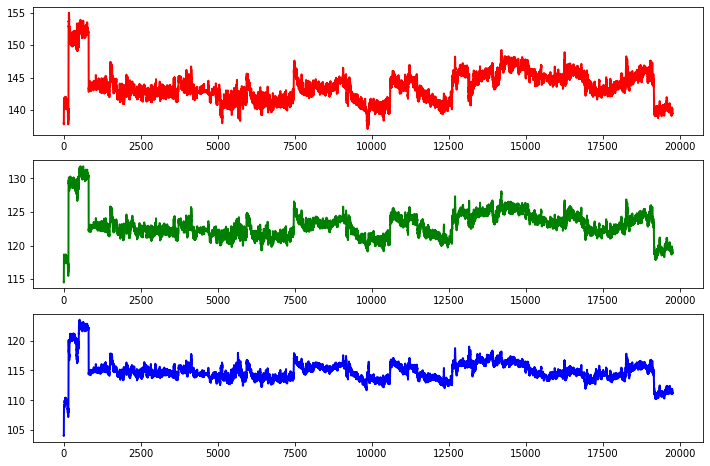

In [3]:
band = [42, 240]
fps = 30

r_signal = []
g_signal = []
b_signal = []
prev_bbox = [0,0,10,10]
curr_bbox = [0,0,10,10]
track_toler = 1
detect_th=0.5
# 얼굴검출 opencv 사용 
detector = cv2.dnn.readNetFromTensorflow('model/face_detector.pb',
                                         'model/face_detector.pbtxt')

times=[]
group=[]
#cap = cv2.VideoCapture(1) # 0: 내장캠 1: 외부캠
#time.sleep(2)

subject=5
file_path="D:\\prlab\\ysg\\rppg\\new\\images\\"+str(subject)
file_list=glob.glob(os.path.join(file_path,"*.png"))
file_list = natsort.natsorted(file_list,reverse=False)

try:
    for file in file_list:
        # group 설정
        g=file.split('\\')[-1].split('_')[1]
        group.append(g)
        # time 설정
        t=file.split('\\')[-1].split('_')[-1][:-4]
        times.append(t)
        # 프레임(img) 가져오기
        print("img path: ",file)
        frame = cv2.imread(file, cv2.IMREAD_COLOR)

        # 현재 프레임에서 얼굴 검출하기
        blob = cv2.dnn.blobFromImage(cv2.resize(frame, (300, 300)), 1.0, (300, 300), [104., 117., 123.], False, False)
        detector.setInput(blob)
        detections = detector.forward()

        h, w = frame.shape[:2]
        bboxes = [detections[0, 0, i, 3:7] for i in range(detections.shape[2]) if detections[0, 0, i, 2] >= detect_th]
        if len(bboxes) > 0:
            bboxes = sorted(bboxes, key=lambda x: (x[2] - x[0]) * (x[3] - x[1]), reverse=True)
            bboxes = [(rect * np.array([w, h, w, h])).astype('int') for rect in bboxes]  # (xs,ys,xe,ye)
            curr_bbox = bboxes[0]
            prev_bbox = curr_bbox
        else:
            curr_bbox = prev_box

        # 얼굴 영역만 잘라내기
        face = frame[curr_bbox[1]:curr_bbox[3], curr_bbox[0]:curr_bbox[2]]

        # remote-PPG 신호 추출하기
        b, g, r = cv2.split(face)
        r_mean = np.mean(r)
        g_mean = np.mean(g)
        b_mean = np.mean(b)
        # 각신호를 담을 list
        r_signal.append(r_mean)
        g_signal.append(g_mean)
        b_signal.append(b_mean)

        # 얼굴 검출 시각화하기
        cv2.rectangle(frame, (curr_bbox[0], curr_bbox[1]), (curr_bbox[2], curr_bbox[3]), (0,0,255), 2)
        cv2.imshow('frame', frame)
        if cv2.waitKey(1) == 27:
            break
            
    
finally:
    cv2.destroyAllWindows()
    print("==================================================!!!finish!!!=================================================")

plt.figure(figsize=(12, 8))
plt.subplot(3,1,1)
plt.plot(r_signal, 'r', linewidth=2)
plt.subplot(3,1,2)
plt.plot(g_signal, 'g', linewidth=2)
plt.subplot(3,1,3)
plt.plot(b_signal, 'b', linewidth=2)
plt.show()

In [4]:
len(times)

19762

pulse length:  (19762,)


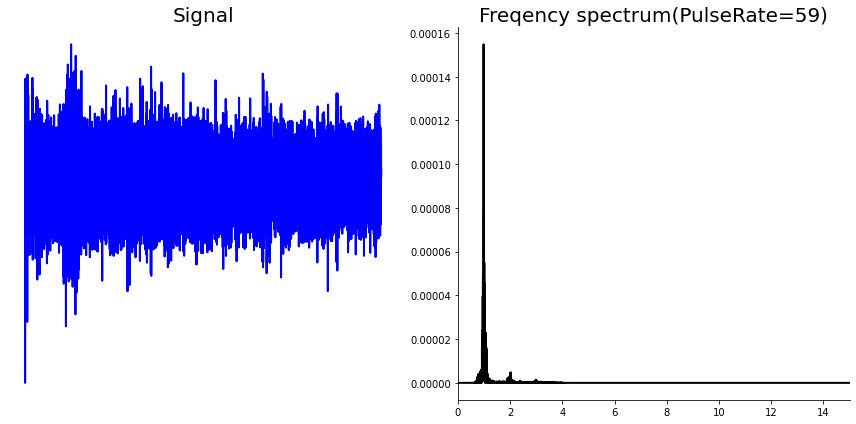

In [5]:
# CHROM 신호 추출
# chrom이란 움직임에 더 강인하게 하는것.
# 움직임은 r,g,b동일하게발생/ pulse는 r,g,b각각 다름
# 이를 이용해 움직임은 제거하고 pulse만 남기도록.

#보통 신호는 g,r,b순으로 잘보인다. 
# 심박수를 더 잘보이게 하기위한 후처리
raw_signal = np.array([r_signal, g_signal, b_signal]).transpose() # 1.세개의 신호를 하나로, 하나의신호화
detrended = detrend_signal(raw_signal, fps) # 2.추세제거
detrended = detrended.transpose()
# 3. 2차원으로 prediction  , 수식에 대해서는 자세히 이해 x
X = 3 * detrended[0] - 2 * detrended[1] # 4. detrend [] > 0: r, 1: g, 2: b
Y = 1.5 * detrended[0] + detrended[1] - 1.5 * detrended[2]
# 5. bandpass filtering
Xf = filter_bandpass(X, fps, band)
Yf = filter_bandpass(Y, fps, band)
alpha = np.std(Xf) / np.std(Yf)
# 6. pulse 신호로 계산
pulse = Xf - alpha * Yf
print("pulse length: ",pulse.shape)

# 심박수 (심장) / '맥박수' (혈관) >> 우리는 맥박수를 보는것.
# 맥박수 계산하는 방법
# 1) 시계열 도메인에서 PPI(peak-to-peak interval) 계산  ==> instant pulse-rate
# 2) 주파수 도메인에서 maximum power band 검출 ==> average pulse-rate


# 주파수 스펙트럼 계산
# 실시간에서는 실시간 fs를 계산해서 파라미터로 넣어줘야함
f, psd = signal.periodogram(pulse, fs=30, window='hann')
max_band = np.argmax(psd)
pr = int(f[max_band] * 60) #분당맥박수
pr = min(max(pr, band[0]), band[1])


plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.plot(pulse, 'b', linewidth=2)    
plt.axis('off')
plt.title('Signal', fontsize=20)

ax = plt.subplot(1,2,2)
plt.plot(f, psd, 'k', linewidth=2)    
plt.xlim([0, 15])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.title('Freqency spectrum(PulseRate={})'.format(pr), fontsize=20)

plt.tight_layout()
plt.show()

file_num=subject
save_path='D:\\prlab\\ysg\\rppg\\new\\data\\rppg\\'
f = open(save_path+'rppg'+str(file_num)+'.csv', 'w', newline='')
wr = csv.writer(f)
wr.writerow(pulse)
wr.writerow(times)
wr.writerow(group)
f.close()

In [11]:
print(pulse.shape)


(253,)
